HW 4 540

1. Generate random 100 MVN data, p=20. 

The covariance matrix should be positive semi- definite symmetric matrix.

(1) Calculate sample covariance matrix.

(2) Find out the first three principal components.

(3) Calcuate the proportions of the variability of data that can be explained by the first K

principal components and find the value of K that it reaches to 99% of the variability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import *
from numpy import *
%matplotlib inline
np.random.seed(42)

In [2]:
# p=20
# The Multivariate  normal distribution with p =20 mean vector is mu.
# The covariance matrix is cov.
mu = np.random.uniform(-10,10,size=20)
C = np.random.random((20,20))
cov = C @ C.T # positive semi-definite

In [3]:
# pd.DataFrame(mu)

In [4]:
# pd.DataFrame(cov)

In [5]:
Ns = 100 #Generate 100 samples from x1-x20
data = np.random.multivariate_normal(mu, cov, size=Ns)
# x1 = data[:, 0]
# x2 = data[:, 1]
# x20 = data[:,19]

In [6]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.028285,7.044339,3.154462,1.512933,-8.328789,-7.193870,-10.987094,5.715640,-0.221718,1.399884,-10.451399,9.042669,4.859458,-6.814617,-7.373136,-6.907790,-5.728633,0.294179,-4.221158,-5.738514
1,-0.515590,11.995261,5.637429,2.997285,-6.097865,-3.984391,-5.453389,8.588510,2.821158,7.042220,-7.480549,10.297076,9.543349,-5.436854,-5.180020,-5.794551,-2.448751,1.445914,0.484887,-2.852837
2,-2.479066,10.646821,4.849100,2.124263,-9.730750,-5.869769,-7.928492,6.088278,2.867902,2.796465,-9.838546,8.643267,7.022822,-9.441560,-5.808307,-5.970584,-3.702099,-1.185063,-1.645960,-3.805320
3,-4.458434,4.703799,0.972906,-1.811516,-9.186672,-7.833511,-11.647068,6.066199,1.609970,2.336624,-13.229310,5.661379,3.785716,-9.200031,-7.838736,-7.669863,-3.852251,-1.571290,-3.070788,-4.241851
4,-3.879918,7.568512,4.935061,-0.196527,-7.957981,-8.662558,-9.007468,7.842679,2.147733,2.952664,-9.888472,9.583231,6.054640,-6.285248,-5.183192,-4.486946,-5.537024,2.671490,0.482965,-5.805538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.397516,10.837161,8.649943,4.253091,-1.054614,-2.681943,-5.196835,11.986974,7.763608,10.628805,-7.367609,14.416739,12.368727,-1.156473,-4.407879,-1.683638,-0.542489,5.721146,4.228138,0.530110
96,-1.796877,7.538869,4.974800,1.361590,-4.923805,-6.963091,-7.507259,8.006786,2.183340,8.307368,-10.447952,8.812065,7.775109,-3.863100,-7.715372,-5.041968,-3.940758,1.632790,-1.097681,-4.714314
97,-2.399115,10.308217,7.303204,2.112219,-4.727047,-5.885492,-9.396458,7.971957,2.162376,5.064158,-8.130651,10.441236,8.347647,-4.811598,-5.792625,-4.762252,-2.148735,2.148741,1.418412,-3.665090
98,0.245599,9.457859,8.235103,3.615507,-5.472358,-4.660447,-5.405865,9.153136,3.516682,6.060665,-7.873163,9.584304,8.393086,-3.429582,-4.927486,-6.374416,-4.626423,3.515643,-1.161484,-6.084489


In [7]:
scov = np.cov(data)
pd.DataFrame(scov)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,36.856321,37.020961,37.622584,34.426330,37.083178,38.954299,37.552800,37.618317,35.312718,37.655638,...,36.223799,36.768742,38.095614,36.359574,38.003355,38.542793,36.387024,37.604051,36.993707,37.307169
1,37.020961,39.281166,39.433087,35.581237,37.670511,39.487389,39.635344,37.639704,36.530726,38.911828,...,37.190858,39.426947,38.873026,37.654700,39.428748,39.751722,37.874643,38.582754,38.212442,39.032862
2,37.622584,39.433087,41.014656,36.387160,38.302720,40.940330,39.731881,39.437799,36.432622,39.168398,...,37.532520,39.487741,39.124181,38.014915,39.882995,39.532426,37.228167,38.902649,38.074250,39.148086
3,34.426330,35.581237,36.387160,34.772525,35.500453,37.626168,36.933072,36.520795,33.351000,35.871090,...,34.420696,36.423025,36.250094,34.054035,36.447515,37.836482,35.281104,35.920298,34.549704,35.959099
4,37.083178,37.670511,38.302720,35.500453,39.470053,40.105515,38.981420,39.573241,35.302045,38.285462,...,36.973666,37.631233,38.919225,35.985171,38.095102,40.131983,37.568338,38.781297,37.879760,37.992678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,38.542793,39.751722,39.532426,37.836482,40.131983,41.231668,41.229646,40.372632,37.409384,40.391815,...,38.215825,40.335921,40.920308,38.408654,40.824969,43.626419,40.613129,40.648052,39.387775,40.421815
96,36.387024,37.874643,37.228167,35.281104,37.568338,38.596682,38.987958,36.734381,36.187312,38.237120,...,36.747611,38.165754,38.476175,36.559585,38.381230,40.613129,38.928975,38.187477,37.985107,38.814561
97,37.604051,38.582754,38.902649,35.920298,38.781297,40.528136,39.695387,39.319490,35.624851,39.493075,...,37.248405,39.174858,39.417547,37.141617,39.353760,40.648052,38.187477,39.804910,38.130020,38.373748
98,36.993707,38.212442,38.074250,34.549704,37.879760,37.890546,38.399571,36.941020,36.585175,38.279764,...,37.426502,37.829436,39.440245,36.557230,38.463803,39.387775,37.985107,38.130020,39.492106,38.695655


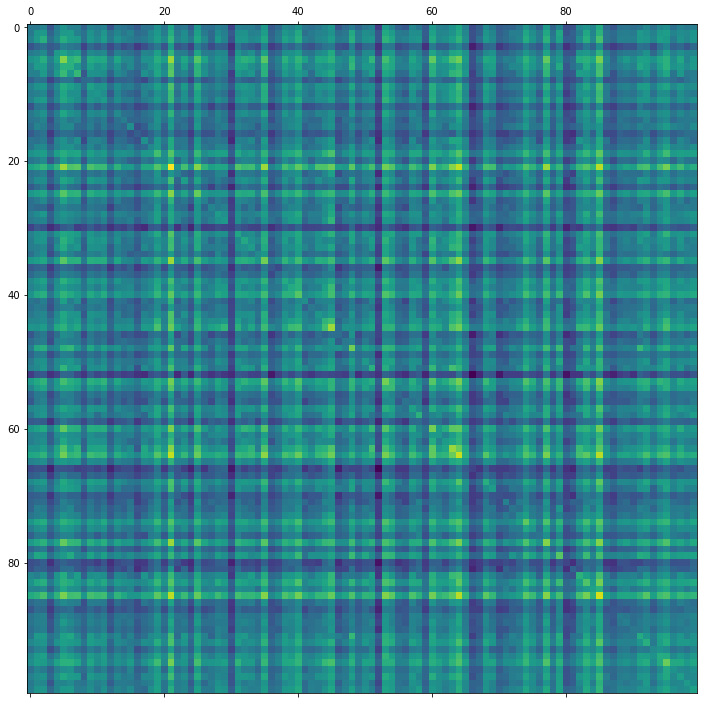

In [8]:
plt.rcParams['figure.figsize']=(12,12)
plt.matshow(scov)
plt.show()

2. Generate $Y$ values using the following regression functions: 

$Y=5+2 X_{1}+5 X_{3}+$ $3 X_{19}+\epsilon$ 
for the generated X matrix in #1

 (1) Estimate the regression line using the least square method and find out the predicted values, residuals for each observation and the mean square errors.

(2) Estimate the regression line using the least square method based on the first 5 principal components and find out the predicted values, residuals for each observation and the mean square errors.

(3) Compare the results in (1) and (2).